## ORB Extraction with PCA

In [2]:
#packages,libraries and modules imported and used
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
folder=r"C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl"
for file in os.listdir(folder):
    dest=os.path.join(folder,file)
    for filename in os.listdir(dest):
        path=os.path.join(dest,filename)
        print(path)

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_11.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_12.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_13.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_14.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_15.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_16.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_17.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_18.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\0\0_10_rotate_5.jp

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\2\2_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\3\3_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_42_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_42_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_43_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_44_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\4\4_44_rotate_10.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_11_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_11_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\5\5_11_rotate_5.jpeg
C:\Us

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\7\7_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\9\9_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\b\b_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\c\c_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\d\d_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\e\e_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\f\f_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\g\g_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\h\h_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\i\i_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\j\j_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\k\k_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\l\l_11_rotate_8.jpeg
C:\Us

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\m\m_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\n\n_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\o\o_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\p\p_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\q\q_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_2_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_2_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_2_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_30_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\r\r_31_rotate_1.jpeg
C:\Users

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_19_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_19_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_19_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_1_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\s\s_20_rotate_1.jpeg
C:\Users\franci

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\t\t_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\u\u_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\v\v_11_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_18_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_19_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_19_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_19_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\w\w_19_rotate_3.jpeg
C:\U

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_11_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_12_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_12_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_12_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_12_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_12_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_12_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\x\x_12_rotate_6.jpeg
C:\Us

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_5_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_5_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_5_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_5_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\y\y_60_rotate_9.jpeg
C:\Users\

C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_3.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_4.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_5.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_6.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_7.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_8.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_10_rotate_9.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_11_rotate_1.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_11_rotate_10.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_11_rotate_2.jpeg
C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl\z\z_11_rotate_3.jpeg
C:\U

In [3]:
folder=r"C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl"

i=1
for file in os.listdir(folder):
    dest=os.path.join(folder,file)
    k=1
    print(file)
    for filename in os.listdir(dest):
        if(k>100):
            print("___________________")
            break
        path=os.path.join(dest,filename)
        a=cv2.imread(path)
    
        #resize image
        resize=(512,512)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        #ORB feature extraction
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(gray, None)
    
        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",i," : ", out.shape)
        i=i+1
        k=k+1
        csv_data=out.to_csv('ORB1.csv', mode='a', header=False,index=False)

0
descriptor shape  1  :  (236, 32)
descriptor shape  2  :  (239, 32)
descriptor shape  3  :  (257, 32)
descriptor shape  4  :  (263, 32)
descriptor shape  5  :  (249, 32)
descriptor shape  6  :  (220, 32)
descriptor shape  7  :  (227, 32)
descriptor shape  8  :  (242, 32)
descriptor shape  9  :  (227, 32)
descriptor shape  10  :  (239, 32)
descriptor shape  11  :  (250, 32)
descriptor shape  12  :  (286, 32)
descriptor shape  13  :  (284, 32)
descriptor shape  14  :  (261, 32)
descriptor shape  15  :  (377, 32)
descriptor shape  16  :  (263, 32)
descriptor shape  17  :  (220, 32)
descriptor shape  18  :  (242, 32)
descriptor shape  19  :  (350, 32)
descriptor shape  20  :  (342, 32)
descriptor shape  21  :  (377, 32)
descriptor shape  22  :  (394, 32)
descriptor shape  23  :  (376, 32)
descriptor shape  24  :  (389, 32)
descriptor shape  25  :  (358, 32)
descriptor shape  26  :  (361, 32)
descriptor shape  27  :  (377, 32)
descriptor shape  28  :  (342, 32)
descriptor shape  29  :  (3

descriptor shape  231  :  (500, 32)
descriptor shape  232  :  (500, 32)
descriptor shape  233  :  (497, 32)
descriptor shape  234  :  (500, 32)
descriptor shape  235  :  (499, 32)
descriptor shape  236  :  (500, 32)
descriptor shape  237  :  (500, 32)
descriptor shape  238  :  (500, 32)
descriptor shape  239  :  (494, 32)
descriptor shape  240  :  (500, 32)
descriptor shape  241  :  (500, 32)
descriptor shape  242  :  (500, 32)
descriptor shape  243  :  (500, 32)
descriptor shape  244  :  (500, 32)
descriptor shape  245  :  (500, 32)
descriptor shape  246  :  (500, 32)
descriptor shape  247  :  (500, 32)
descriptor shape  248  :  (500, 32)
descriptor shape  249  :  (483, 32)
descriptor shape  250  :  (500, 32)
descriptor shape  251  :  (495, 32)
descriptor shape  252  :  (500, 32)
descriptor shape  253  :  (500, 32)
descriptor shape  254  :  (500, 32)
descriptor shape  255  :  (490, 32)
descriptor shape  256  :  (500, 32)
descriptor shape  257  :  (500, 32)
descriptor shape  258  :  (5

descriptor shape  460  :  (461, 32)
descriptor shape  461  :  (438, 32)
descriptor shape  462  :  (436, 32)
descriptor shape  463  :  (432, 32)
descriptor shape  464  :  (446, 32)
descriptor shape  465  :  (402, 32)
descriptor shape  466  :  (469, 32)
descriptor shape  467  :  (500, 32)
descriptor shape  468  :  (453, 32)
descriptor shape  469  :  (404, 32)
descriptor shape  470  :  (427, 32)
descriptor shape  471  :  (357, 32)
descriptor shape  472  :  (348, 32)
descriptor shape  473  :  (356, 32)
descriptor shape  474  :  (399, 32)
descriptor shape  475  :  (343, 32)
descriptor shape  476  :  (447, 32)
descriptor shape  477  :  (469, 32)
descriptor shape  478  :  (459, 32)
descriptor shape  479  :  (379, 32)
descriptor shape  480  :  (423, 32)
descriptor shape  481  :  (401, 32)
descriptor shape  482  :  (387, 32)
descriptor shape  483  :  (420, 32)
descriptor shape  484  :  (415, 32)
descriptor shape  485  :  (383, 32)
descriptor shape  486  :  (453, 32)
descriptor shape  487  :  (4

descriptor shape  689  :  (500, 32)
descriptor shape  690  :  (500, 32)
descriptor shape  691  :  (500, 32)
descriptor shape  692  :  (500, 32)
descriptor shape  693  :  (500, 32)
descriptor shape  694  :  (500, 32)
descriptor shape  695  :  (500, 32)
descriptor shape  696  :  (500, 32)
descriptor shape  697  :  (500, 32)
descriptor shape  698  :  (500, 32)
descriptor shape  699  :  (500, 32)
descriptor shape  700  :  (500, 32)
___________________
7
descriptor shape  701  :  (370, 32)
descriptor shape  702  :  (379, 32)
descriptor shape  703  :  (407, 32)
descriptor shape  704  :  (396, 32)
descriptor shape  705  :  (401, 32)
descriptor shape  706  :  (422, 32)
descriptor shape  707  :  (461, 32)
descriptor shape  708  :  (424, 32)
descriptor shape  709  :  (374, 32)
descriptor shape  710  :  (357, 32)
descriptor shape  711  :  (500, 32)
descriptor shape  712  :  (500, 32)
descriptor shape  713  :  (487, 32)
descriptor shape  714  :  (500, 32)
descriptor shape  715  :  (471, 32)
descri

descriptor shape  918  :  (500, 32)
descriptor shape  919  :  (492, 32)
descriptor shape  920  :  (500, 32)
descriptor shape  921  :  (500, 32)
descriptor shape  922  :  (500, 32)
descriptor shape  923  :  (500, 32)
descriptor shape  924  :  (500, 32)
descriptor shape  925  :  (490, 32)
descriptor shape  926  :  (500, 32)
descriptor shape  927  :  (500, 32)
descriptor shape  928  :  (500, 32)
descriptor shape  929  :  (500, 32)
descriptor shape  930  :  (500, 32)
descriptor shape  931  :  (500, 32)
descriptor shape  932  :  (500, 32)
descriptor shape  933  :  (500, 32)
descriptor shape  934  :  (500, 32)
descriptor shape  935  :  (470, 32)
descriptor shape  936  :  (500, 32)
descriptor shape  937  :  (500, 32)
descriptor shape  938  :  (500, 32)
descriptor shape  939  :  (499, 32)
descriptor shape  940  :  (500, 32)
descriptor shape  941  :  (500, 32)
descriptor shape  942  :  (500, 32)
descriptor shape  943  :  (496, 32)
descriptor shape  944  :  (498, 32)
descriptor shape  945  :  (4

descriptor shape  1141  :  (500, 32)
descriptor shape  1142  :  (500, 32)
descriptor shape  1143  :  (500, 32)
descriptor shape  1144  :  (500, 32)
descriptor shape  1145  :  (497, 32)
descriptor shape  1146  :  (500, 32)
descriptor shape  1147  :  (500, 32)
descriptor shape  1148  :  (500, 32)
descriptor shape  1149  :  (500, 32)
descriptor shape  1150  :  (500, 32)
descriptor shape  1151  :  (500, 32)
descriptor shape  1152  :  (500, 32)
descriptor shape  1153  :  (500, 32)
descriptor shape  1154  :  (500, 32)
descriptor shape  1155  :  (462, 32)
descriptor shape  1156  :  (498, 32)
descriptor shape  1157  :  (500, 32)
descriptor shape  1158  :  (496, 32)
descriptor shape  1159  :  (497, 32)
descriptor shape  1160  :  (500, 32)
descriptor shape  1161  :  (500, 32)
descriptor shape  1162  :  (500, 32)
descriptor shape  1163  :  (500, 32)
descriptor shape  1164  :  (498, 32)
descriptor shape  1165  :  (477, 32)
descriptor shape  1166  :  (498, 32)
descriptor shape  1167  :  (500, 32)
d

descriptor shape  1366  :  (500, 32)
descriptor shape  1367  :  (500, 32)
descriptor shape  1368  :  (500, 32)
descriptor shape  1369  :  (500, 32)
descriptor shape  1370  :  (500, 32)
descriptor shape  1371  :  (500, 32)
descriptor shape  1372  :  (500, 32)
descriptor shape  1373  :  (500, 32)
descriptor shape  1374  :  (500, 32)
descriptor shape  1375  :  (500, 32)
descriptor shape  1376  :  (500, 32)
descriptor shape  1377  :  (500, 32)
descriptor shape  1378  :  (500, 32)
descriptor shape  1379  :  (500, 32)
descriptor shape  1380  :  (500, 32)
descriptor shape  1381  :  (500, 32)
descriptor shape  1382  :  (500, 32)
descriptor shape  1383  :  (500, 32)
descriptor shape  1384  :  (500, 32)
descriptor shape  1385  :  (496, 32)
descriptor shape  1386  :  (500, 32)
descriptor shape  1387  :  (500, 32)
descriptor shape  1388  :  (500, 32)
descriptor shape  1389  :  (500, 32)
descriptor shape  1390  :  (500, 32)
descriptor shape  1391  :  (447, 32)
descriptor shape  1392  :  (458, 32)
d

descriptor shape  1588  :  (500, 32)
descriptor shape  1589  :  (500, 32)
descriptor shape  1590  :  (500, 32)
descriptor shape  1591  :  (378, 32)
descriptor shape  1592  :  (380, 32)
descriptor shape  1593  :  (395, 32)
descriptor shape  1594  :  (365, 32)
descriptor shape  1595  :  (316, 32)
descriptor shape  1596  :  (370, 32)
descriptor shape  1597  :  (385, 32)
descriptor shape  1598  :  (372, 32)
descriptor shape  1599  :  (329, 32)
descriptor shape  1600  :  (412, 32)
___________________
g
descriptor shape  1601  :  (273, 32)
descriptor shape  1602  :  (265, 32)
descriptor shape  1603  :  (305, 32)
descriptor shape  1604  :  (317, 32)
descriptor shape  1605  :  (316, 32)
descriptor shape  1606  :  (402, 32)
descriptor shape  1607  :  (348, 32)
descriptor shape  1608  :  (348, 32)
descriptor shape  1609  :  (281, 32)
descriptor shape  1610  :  (308, 32)
descriptor shape  1611  :  (469, 32)
descriptor shape  1612  :  (464, 32)
descriptor shape  1613  :  (474, 32)
descriptor shape

descriptor shape  1810  :  (378, 32)
descriptor shape  1811  :  (500, 32)
descriptor shape  1812  :  (500, 32)
descriptor shape  1813  :  (500, 32)
descriptor shape  1814  :  (500, 32)
descriptor shape  1815  :  (500, 32)
descriptor shape  1816  :  (500, 32)
descriptor shape  1817  :  (500, 32)
descriptor shape  1818  :  (500, 32)
descriptor shape  1819  :  (499, 32)
descriptor shape  1820  :  (500, 32)
descriptor shape  1821  :  (489, 32)
descriptor shape  1822  :  (495, 32)
descriptor shape  1823  :  (500, 32)
descriptor shape  1824  :  (500, 32)
descriptor shape  1825  :  (500, 32)
descriptor shape  1826  :  (500, 32)
descriptor shape  1827  :  (500, 32)
descriptor shape  1828  :  (500, 32)
descriptor shape  1829  :  (500, 32)
descriptor shape  1830  :  (500, 32)
descriptor shape  1831  :  (500, 32)
descriptor shape  1832  :  (500, 32)
descriptor shape  1833  :  (500, 32)
descriptor shape  1834  :  (500, 32)
descriptor shape  1835  :  (500, 32)
descriptor shape  1836  :  (500, 32)
d

descriptor shape  2031  :  (500, 32)
descriptor shape  2032  :  (500, 32)
descriptor shape  2033  :  (500, 32)
descriptor shape  2034  :  (500, 32)
descriptor shape  2035  :  (498, 32)
descriptor shape  2036  :  (500, 32)
descriptor shape  2037  :  (500, 32)
descriptor shape  2038  :  (500, 32)
descriptor shape  2039  :  (500, 32)
descriptor shape  2040  :  (500, 32)
descriptor shape  2041  :  (500, 32)
descriptor shape  2042  :  (500, 32)
descriptor shape  2043  :  (498, 32)
descriptor shape  2044  :  (500, 32)
descriptor shape  2045  :  (496, 32)
descriptor shape  2046  :  (500, 32)
descriptor shape  2047  :  (500, 32)
descriptor shape  2048  :  (500, 32)
descriptor shape  2049  :  (500, 32)
descriptor shape  2050  :  (500, 32)
descriptor shape  2051  :  (500, 32)
descriptor shape  2052  :  (500, 32)
descriptor shape  2053  :  (500, 32)
descriptor shape  2054  :  (500, 32)
descriptor shape  2055  :  (500, 32)
descriptor shape  2056  :  (500, 32)
descriptor shape  2057  :  (500, 32)
d

descriptor shape  2255  :  (499, 32)
descriptor shape  2256  :  (494, 32)
descriptor shape  2257  :  (500, 32)
descriptor shape  2258  :  (497, 32)
descriptor shape  2259  :  (469, 32)
descriptor shape  2260  :  (490, 32)
descriptor shape  2261  :  (500, 32)
descriptor shape  2262  :  (500, 32)
descriptor shape  2263  :  (500, 32)
descriptor shape  2264  :  (500, 32)
descriptor shape  2265  :  (500, 32)
descriptor shape  2266  :  (500, 32)
descriptor shape  2267  :  (500, 32)
descriptor shape  2268  :  (500, 32)
descriptor shape  2269  :  (500, 32)
descriptor shape  2270  :  (500, 32)
descriptor shape  2271  :  (500, 32)
descriptor shape  2272  :  (500, 32)
descriptor shape  2273  :  (500, 32)
descriptor shape  2274  :  (500, 32)
descriptor shape  2275  :  (500, 32)
descriptor shape  2276  :  (500, 32)
descriptor shape  2277  :  (500, 32)
descriptor shape  2278  :  (500, 32)
descriptor shape  2279  :  (500, 32)
descriptor shape  2280  :  (500, 32)
descriptor shape  2281  :  (500, 32)
d

descriptor shape  2476  :  (500, 32)
descriptor shape  2477  :  (500, 32)
descriptor shape  2478  :  (500, 32)
descriptor shape  2479  :  (500, 32)
descriptor shape  2480  :  (500, 32)
descriptor shape  2481  :  (500, 32)
descriptor shape  2482  :  (500, 32)
descriptor shape  2483  :  (500, 32)
descriptor shape  2484  :  (500, 32)
descriptor shape  2485  :  (500, 32)
descriptor shape  2486  :  (500, 32)
descriptor shape  2487  :  (500, 32)
descriptor shape  2488  :  (500, 32)
descriptor shape  2489  :  (500, 32)
descriptor shape  2490  :  (500, 32)
descriptor shape  2491  :  (500, 32)
descriptor shape  2492  :  (500, 32)
descriptor shape  2493  :  (500, 32)
descriptor shape  2494  :  (500, 32)
descriptor shape  2495  :  (500, 32)
descriptor shape  2496  :  (500, 32)
descriptor shape  2497  :  (500, 32)
descriptor shape  2498  :  (500, 32)
descriptor shape  2499  :  (500, 32)
descriptor shape  2500  :  (500, 32)
___________________
p
descriptor shape  2501  :  (375, 32)
descriptor shape

descriptor shape  2700  :  (500, 32)
___________________
r
descriptor shape  2701  :  (488, 32)
descriptor shape  2702  :  (493, 32)
descriptor shape  2703  :  (500, 32)
descriptor shape  2704  :  (500, 32)
descriptor shape  2705  :  (495, 32)
descriptor shape  2706  :  (500, 32)
descriptor shape  2707  :  (500, 32)
descriptor shape  2708  :  (500, 32)
descriptor shape  2709  :  (480, 32)
descriptor shape  2710  :  (500, 32)
descriptor shape  2711  :  (500, 32)
descriptor shape  2712  :  (500, 32)
descriptor shape  2713  :  (500, 32)
descriptor shape  2714  :  (500, 32)
descriptor shape  2715  :  (500, 32)
descriptor shape  2716  :  (500, 32)
descriptor shape  2717  :  (500, 32)
descriptor shape  2718  :  (500, 32)
descriptor shape  2719  :  (500, 32)
descriptor shape  2720  :  (500, 32)
descriptor shape  2721  :  (499, 32)
descriptor shape  2722  :  (484, 32)
descriptor shape  2723  :  (500, 32)
descriptor shape  2724  :  (500, 32)
descriptor shape  2725  :  (474, 32)
descriptor shape

descriptor shape  2923  :  (482, 32)
descriptor shape  2924  :  (500, 32)
descriptor shape  2925  :  (459, 32)
descriptor shape  2926  :  (478, 32)
descriptor shape  2927  :  (487, 32)
descriptor shape  2928  :  (478, 32)
descriptor shape  2929  :  (392, 32)
descriptor shape  2930  :  (479, 32)
descriptor shape  2931  :  (464, 32)
descriptor shape  2932  :  (478, 32)
descriptor shape  2933  :  (464, 32)
descriptor shape  2934  :  (500, 32)
descriptor shape  2935  :  (475, 32)
descriptor shape  2936  :  (464, 32)
descriptor shape  2937  :  (492, 32)
descriptor shape  2938  :  (464, 32)
descriptor shape  2939  :  (415, 32)
descriptor shape  2940  :  (474, 32)
descriptor shape  2941  :  (424, 32)
descriptor shape  2942  :  (433, 32)
descriptor shape  2943  :  (455, 32)
descriptor shape  2944  :  (499, 32)
descriptor shape  2945  :  (420, 32)
descriptor shape  2946  :  (461, 32)
descriptor shape  2947  :  (459, 32)
descriptor shape  2948  :  (404, 32)
descriptor shape  2949  :  (362, 32)
d

descriptor shape  3148  :  (500, 32)
descriptor shape  3149  :  (500, 32)
descriptor shape  3150  :  (500, 32)
descriptor shape  3151  :  (493, 32)
descriptor shape  3152  :  (494, 32)
descriptor shape  3153  :  (500, 32)
descriptor shape  3154  :  (500, 32)
descriptor shape  3155  :  (484, 32)
descriptor shape  3156  :  (500, 32)
descriptor shape  3157  :  (500, 32)
descriptor shape  3158  :  (500, 32)
descriptor shape  3159  :  (496, 32)
descriptor shape  3160  :  (500, 32)
descriptor shape  3161  :  (500, 32)
descriptor shape  3162  :  (500, 32)
descriptor shape  3163  :  (500, 32)
descriptor shape  3164  :  (500, 32)
descriptor shape  3165  :  (500, 32)
descriptor shape  3166  :  (500, 32)
descriptor shape  3167  :  (500, 32)
descriptor shape  3168  :  (500, 32)
descriptor shape  3169  :  (500, 32)
descriptor shape  3170  :  (500, 32)
descriptor shape  3171  :  (500, 32)
descriptor shape  3172  :  (500, 32)
descriptor shape  3173  :  (500, 32)
descriptor shape  3174  :  (500, 32)
d

descriptor shape  3370  :  (492, 32)
descriptor shape  3371  :  (500, 32)
descriptor shape  3372  :  (500, 32)
descriptor shape  3373  :  (500, 32)
descriptor shape  3374  :  (500, 32)
descriptor shape  3375  :  (500, 32)
descriptor shape  3376  :  (500, 32)
descriptor shape  3377  :  (500, 32)
descriptor shape  3378  :  (500, 32)
descriptor shape  3379  :  (497, 32)
descriptor shape  3380  :  (500, 32)
descriptor shape  3381  :  (500, 32)
descriptor shape  3382  :  (500, 32)
descriptor shape  3383  :  (500, 32)
descriptor shape  3384  :  (500, 32)
descriptor shape  3385  :  (500, 32)
descriptor shape  3386  :  (500, 32)
descriptor shape  3387  :  (500, 32)
descriptor shape  3388  :  (500, 32)
descriptor shape  3389  :  (500, 32)
descriptor shape  3390  :  (500, 32)
descriptor shape  3391  :  (500, 32)
descriptor shape  3392  :  (500, 32)
descriptor shape  3393  :  (500, 32)
descriptor shape  3394  :  (500, 32)
descriptor shape  3395  :  (500, 32)
descriptor shape  3396  :  (500, 32)
d

descriptor shape  3594  :  (353, 32)
descriptor shape  3595  :  (351, 32)
descriptor shape  3596  :  (393, 32)
descriptor shape  3597  :  (450, 32)
descriptor shape  3598  :  (400, 32)
descriptor shape  3599  :  (350, 32)
descriptor shape  3600  :  (359, 32)
___________________


In [3]:
#Feature vector of Dogs Dataset
data= pd.read_csv(r'ORB1.csv',header=None,dtype='uint8')#,dtype='uint8'
data=data.astype(np.uint8)

#shape
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,126,116,118,252,111,127,126,200,63,246,...,251,221,191,251,143,191,183,124,111,215
1,254,41,230,158,173,214,190,200,191,254,...,251,242,187,243,143,187,7,124,63,86
2,250,45,166,158,173,91,254,238,191,180,...,203,248,191,115,223,179,23,124,125,206
3,124,240,125,242,45,205,89,216,175,60,...,251,181,223,219,103,123,194,136,70,115
4,31,110,246,255,175,63,252,200,191,178,...,239,240,148,250,207,182,231,253,67,181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679283,11,223,251,213,118,222,255,246,125,206,...,37,239,102,127,190,128,111,212,103,253
1679284,232,169,189,250,141,221,85,143,203,21,...,242,177,203,217,212,123,210,76,214,106
1679285,191,247,105,166,154,23,159,248,131,224,...,60,254,58,77,173,188,63,183,43,213
1679286,92,144,157,242,169,236,17,7,174,31,...,155,48,201,243,94,95,128,64,133,98


In [4]:
scalar= StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(data))

df_scaled

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.236230,-0.346768,-0.367852,1.269470,-0.578389,-0.040392,-0.354473,0.433472,-1.025242,1.301658,...,1.287154,0.632209,0.437927,1.169282,0.051429,0.949569,0.851609,-0.250158,-0.405901,0.956982
1,1.963372,-1.431630,1.258066,-0.176381,0.280115,1.063562,0.576432,0.433472,0.966066,1.404448,...,1.287154,0.881864,0.385347,1.069808,0.051429,0.893688,-1.759310,-0.250158,-1.103252,-0.714180
2,1.909399,-1.373771,0.328970,-0.176381,0.280115,-0.497200,1.507337,0.948195,0.966066,0.453640,...,0.692795,0.953194,0.437927,-0.521780,1.186683,0.781925,-1.521954,-0.250158,-0.202507,0.840389
3,0.209243,1.446871,-0.266232,1.115656,-1.492281,0.949360,-0.892652,0.650198,0.717153,-1.088209,...,1.287154,0.156675,0.858567,0.771385,-0.516199,-0.000409,1.014791,-0.096704,-1.001555,-0.338493
4,-1.045634,-0.433557,1.490340,1.315614,0.307809,-0.852495,1.478246,0.433472,0.966066,0.427943,...,1.138564,0.858087,-0.127307,1.156847,0.959632,0.823836,1.563678,1.399476,-1.045139,0.516521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679283,-1.315500,1.200968,1.562925,0.669596,-0.481461,1.165075,1.521882,1.056558,-0.060702,0.787708,...,-1.362695,0.846199,-0.731977,-0.372569,0.718391,0.069442,-0.216494,0.875174,-0.522126,1.449263
1679284,1.666519,0.419868,0.662864,1.238707,-0.162984,1.152386,-0.950834,-0.338612,1.152751,-1.589311,...,1.175712,0.109122,0.595667,0.746516,1.030586,-0.000409,1.252148,-0.863975,1.090497,-0.455085
1679285,1.113294,1.548124,-0.556575,-0.053330,0.017025,-1.360060,0.125525,1.083648,0.032640,1.018985,...,-1.077898,1.024524,-1.310356,-0.994283,0.477149,0.907658,-0.928563,0.504326,-1.393814,0.931073
1679286,-0.222542,0.058247,0.198316,1.115656,0.224727,1.342723,-1.939920,-2.180779,0.701595,-1.460823,...,0.098437,-1.424473,0.569377,1.069808,-0.643915,-0.391577,0.035697,-1.017430,-0.086282,-0.558723


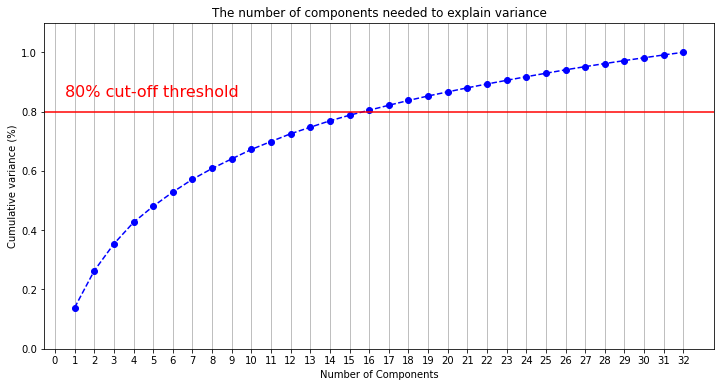

In [4]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_scaled)

#% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 33, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 33, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.80, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Text(0, 0.5, 'Explained Varience')

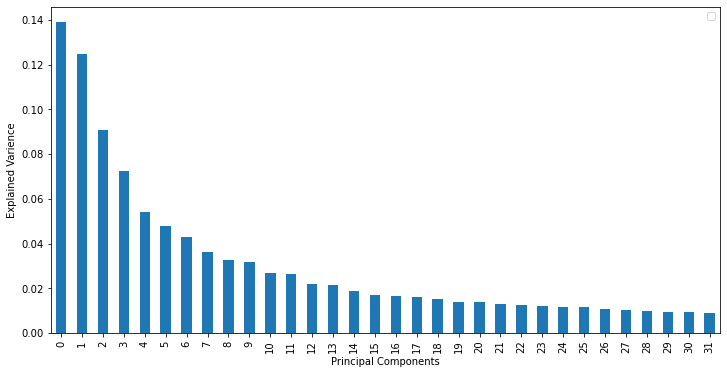

In [5]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

In [5]:
N_pca = PCA(n_components = 15)
PC=N_pca.fit(df_scaled)
PC

PCA(n_components=15)

In [6]:
folder=r"C:\Users\francis\Desktop\Practice\ORB+F_Brief\asl"

i=1
for file in os.listdir(folder):
    dest=os.path.join(folder,file)
    k=1
    #vector=[]
    print(file)
    x=1
    for filename in os.listdir(dest):
        if(k>100):
            print("___________________")
            break
        path=os.path.join(dest,filename)
        a=cv2.imread(path)
    
        #resize image
        resize=(512,512)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
        #ORB feature extraction
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(gray, None)
    
        #convert the descriptor array into a dataframe format
        out=pd.DataFrame(descriptors)
        print("descriptor shape ",x," : ", out.shape)
        x=x+1
        #predict values of feature vector with pretrained kmeans
        #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
        df_scaled_2 = pd.DataFrame(scalar.transform(out))
        
    
        PC = N_pca.transform(df_scaled_2)
        
    
        Data = pd.DataFrame(data = PC)
        
    
        hist=np.histogram(Data)
    
    
        hist=pd.DataFrame(hist[0])
        data = hist.transpose()
        
        #vector.append(data.values)
        k=k+1
        #convert Array to Dataframe and append to the list
    
        Output = pd.DataFrame(data)
        #add row class 
        Output["Class"] = i 
        print(Output)
        csv_data=Output.to_csv('Reduced_ORB1.csv', mode='a',header=False,index=False)
    i=i+1
    

0
descriptor shape  1  :  (236, 32)
    0   1    2    3     4    5    6    7   8  9  Class
0  29  53  255  730  1212  823  308  110  17  3      1
descriptor shape  2  :  (239, 32)
    0   1    2    3     4    5    6    7   8  9  Class
0  35  61  227  643  1151  937  367  133  22  9      1
descriptor shape  3  :  (257, 32)
    0   1    2    3     4    5    6    7   8  9  Class
0  28  64  240  710  1294  979  383  113  36  8      1
descriptor shape  4  :  (263, 32)
    0   1    2    3     4    5    6    7   8  9  Class
0  31  86  248  748  1314  985  366  126  38  3      1
descriptor shape  5  :  (249, 32)
    0   1    2    3     4     5    6    7   8  9  Class
0  30  57  175  628  1180  1024  424  164  49  4      1
descriptor shape  6  :  (220, 32)
    0   1    2    3     4    5    6    7   8  9  Class
0  27  55  161  582  1053  903  367  121  28  3      1
descriptor shape  7  :  (227, 32)
    0   1    2    3     4    5    6    7   8  9  Class
0  28  50  179  546  1079  957  383  138  4

descriptor shape  58  :  (418, 32)
    0    1    2     3     4    5    6   7   8  9  Class
0  30  164  775  2159  2079  759  221  68  13  2      1
descriptor shape  59  :  (383, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  17  94  352  1200  2154  1281  437  161  31  18      1
descriptor shape  60  :  (360, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  10  86  376  1163  1993  1236  373  115  39  9      1
descriptor shape  61  :  (369, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  26  101  416  1303  2000  1118  379  144  35  13      1
descriptor shape  62  :  (360, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  11  66  282  927  1931  1415  513  196  47  12      1
descriptor shape  63  :  (355, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  22  80  384  1123  1947  1198  393  130  38  10      1
descriptor shape  64  :  (340, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  12  6

    0   1    2     3     4     5    6    7   8   9  Class
0  17  93  352  1126  2029  1521  594  172  49  17      2
descriptor shape  15  :  (380, 32)
   0   1    2    3     4     5    6    7   8   9  Class
0  8  78  265  930  1881  1646  656  172  49  15      2
descriptor shape  16  :  (377, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  15  84  348  1068  1990  1447  522  137  36  8      2
descriptor shape  17  :  (427, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  17  98  321  1124  2078  1792  711  207  53  4      2
descriptor shape  18  :  (403, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  27  112  455  1338  1993  1439  497  143  30  11      2
descriptor shape  19  :  (326, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  15  72  221  915  1655  1330  499  135  38  10      2
descriptor shape  20  :  (368, 32)
    0    1    2    3     4     5    6    7   8  9  Class
0  13  100  274  914  1823  1556  612  182  3

    0    1    2     3     4     5    6    7   8   9  Class
0  41  160  533  1592  2537  1441  383  133  44  36      2
descriptor shape  71  :  (259, 32)
    0    1    2     3     4    5    6   7   8   9  Class
0  28  126  391  1100  1345  603  171  74  28  19      2
descriptor shape  72  :  (260, 32)
    0   1    2     3     4    5    6   7   8   9  Class
0  11  90  325  1017  1450  715  180  69  26  17      2
descriptor shape  73  :  (231, 32)
    0    1    2    3     4    5    6   7   8   9  Class
0  17  119  291  890  1277  585  163  66  33  24      2
descriptor shape  74  :  (263, 32)
    0    1    2     3     4    5    6   7   8   9  Class
0  21  103  348  1022  1435  696  186  69  41  24      2
descriptor shape  75  :  (222, 32)
    0   1    2    3     4    5    6   7   8   9  Class
0  15  86  279  863  1254  586  151  63  19  14      2
descriptor shape  76  :  (248, 32)
    0    1    2     3     4    5    6   7   8   9  Class
0  21  106  348  1010  1325  635  160  69  27  19    

    0    1    2     3     4     5    6    7   8   9  Class
0  39  169  677  1596  2450  1656  671  179  49  14      3
descriptor shape  29  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  32  156  642  1551  2464  1725  682  193  42  13      3
descriptor shape  30  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  49  176  696  1645  2396  1671  604  200  49  14      3
descriptor shape  31  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  22  127  507  1418  2602  1945  669  157  42  11      3
descriptor shape  32  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  17  118  458  1346  2534  2053  745  169  44  16      3
descriptor shape  33  :  (497, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  15  144  434  1336  2619  1965  692  185  46  19      3
descriptor shape  34  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  28  173  664  1730  

    0   1    2     3     4     5    6    7   8   9  Class
0  11  81  431  1377  2624  2024  659  205  72  16      3
descriptor shape  83  :  (500, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  4  66  347  1260  2604  2105  797  219  74  24      3
descriptor shape  84  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  12  102  499  1597  2609  1795  612  209  48  17      3
descriptor shape  85  :  (497, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  7  78  385  1328  2588  2041  719  241  51  17      3
descriptor shape  86  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  11  95  560  1662  2771  1666  517  174  33  11      3
descriptor shape  87  :  (500, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  8  65  286  1088  2364  2302  955  319  85  28      3
descriptor shape  88  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  17  152  603  1641  2593  1693  555 

    0    1    2     3     4     5    6    7   8   9  Class
0  22  152  639  1844  2699  1568  422  121  13  20      4
descriptor shape  38  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  160  634  1898  2734  1463  447  108  14  22      4
descriptor shape  39  :  (468, 32)
    0    1    2     3     4     5    6   7   8   9  Class
0  31  178  710  1911  2412  1281  366  90  20  21      4
descriptor shape  40  :  (495, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  10  130  581  1715  2741  1606  470  136  20  16      4
descriptor shape  41  :  (468, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  21  176  654  1853  2470  1291  386  125  29  15      4
descriptor shape  42  :  (480, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  35  188  746  2022  2530  1197  336  101  33  12      4
descriptor shape  43  :  (478, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  25  142  643  1796  24

descriptor shape  94  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  15  113  421  1501  2695  1892  637  165  44  17      4
descriptor shape  95  :  (489, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  163  479  1565  2598  1732  555  158  37  17      4
descriptor shape  96  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  36  165  585  1702  2695  1602  520  143  45  7      4
descriptor shape  97  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  172  556  1584  2631  1693  610  161  51  13      4
descriptor shape  98  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  23  157  610  1804  2706  1535  481  135  35  14      4
descriptor shape  99  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  163  555  1661  2740  1631  537  127  38  17      4
descriptor shape  100  :  (500, 32)
    0    1    2     3     4     5    6    7   8 

descriptor shape  48  :  (489, 32)
    0    1    2     3     4     5    6   7   8   9  Class
0  22  191  587  1772  2771  1458  398  99  23  14      5
descriptor shape  49  :  (479, 32)
    0    1    2     3     4     5    6   7   8   9  Class
0  20  182  659  1878  2717  1244  368  87  17  13      5
descriptor shape  50  :  (474, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  30  178  665  1822  2553  1334  381  107  21  19      5
descriptor shape  51  :  (434, 32)
    0    1    2     3     4     5    6   7   8   9  Class
0  25  186  605  1926  2360  1042  273  66  17  10      5
descriptor shape  52  :  (444, 32)
    0    1    2     3     4     5    6   7   8   9  Class
0  13  128  458  1611  2601  1346  372  98  22  11      5
descriptor shape  53  :  (473, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  14  107  383  1383  2628  1865  540  132  27  16      5
descriptor shape  54  :  (441, 32)
    0    1    2     3     4     5    6    7   8   9  Cl

descriptor shape  3  :  (180, 32)
    0    1    2    3    4    5   6   7   8   9  Class
0  42  137  442  869  775  271  98  37  13  16      6
descriptor shape  4  :  (201, 32)
    0    1    2    3    4    5   6   7   8   9  Class
0  22  122  448  971  971  318  99  39  11  14      6
descriptor shape  5  :  (206, 32)
    0    1    2     3    4    5   6   7   8  9  Class
0  54  221  587  1066  782  246  83  35  10  6      6
descriptor shape  6  :  (242, 32)
    0    1    2     3     4    5    6   7   8  9  Class
0  27  159  406  1043  1147  547  175  93  26  7      6
descriptor shape  7  :  (265, 32)
    0    1    2     3     4    5    6   7   8  9  Class
0  21  136  447  1088  1297  672  205  74  30  5      6
descriptor shape  8  :  (212, 32)
    0    1    2    3    4    5    6    7   8   9  Class
0  18  105  328  692  974  664  237  112  38  12      6
descriptor shape  9  :  (166, 32)
    0    1    2    3    4    5   6   7  8  9  Class
0  35  153  482  836  623  241  71  35  7  7      

    0    1    2     3     4     5    6    7   8   9  Class
0  43  181  610  1814  2678  1382  439  123  19  16      6
descriptor shape  63  :  (484, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  33  139  431  1283  2369  1930  761  222  79  13      6
descriptor shape  64  :  (476, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  27  105  389  1229  2308  2009  768  239  52  14      6
descriptor shape  65  :  (472, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  25  103  374  1288  2447  1931  677  182  44  9      6
descriptor shape  66  :  (464, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  10  75  269  777  1876  2304  1140  382  109  18      6
descriptor shape  67  :  (493, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  14  99  253  789  1900  2350  1352  492  122  24      6
descriptor shape  68  :  (488, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  19  103  410  1214  253

    0   1    2     3     4     5    6    7   8   9  Class
0  21  97  445  1377  2531  2015  735  228  41  10      7
descriptor shape  17  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  23  133  506  1535  2508  1831  721  198  39  6      7
descriptor shape  18  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  17  111  518  1534  2541  1848  700  187  39  5      7
descriptor shape  19  :  (468, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  23  108  468  1455  2408  1681  631  194  42  10      7
descriptor shape  20  :  (489, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  12  69  376  1412  2837  1902  573  116  28  10      7
descriptor shape  21  :  (482, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  106  533  1768  2603  1560  480  108  29  14      7
descriptor shape  22  :  (483, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  34  139  551  1695  2575  15

    0    1    2     3     4     5    6    7   8   9  Class
0  19  125  580  1720  2610  1641  583  171  36  15      7
descriptor shape  72  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  142  662  1814  2646  1514  491  144  45  11      7
descriptor shape  73  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  24  103  578  1652  2580  1682  616  210  37  18      7
descriptor shape  74  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  30  139  603  1716  2447  1674  611  210  55  15      7
descriptor shape  75  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  18  99  579  1700  2641  1648  587  170  43  15      7
descriptor shape  76  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  19  138  592  1675  2521  1684  634  187  41  9      7
descriptor shape  77  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  11  105  484  1589  2693

    0    1    2     3     4     5    6    7   8   9  Class
0  28  142  684  2041  2735  1326  357  137  30  20      8
descriptor shape  28  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  40  158  734  2171  2668  1214  374  102  24  15      8
descriptor shape  29  :  (466, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  44  128  574  1852  2482  1320  409  129  41  11      8
descriptor shape  30  :  (488, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  32  99  422  1435  2620  1734  679  215  66  18      8
descriptor shape  31  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  39  131  569  1832  2711  1520  504  147  36  11      8
descriptor shape  32  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  36  132  599  2017  2756  1353  436  134  28  9      8
descriptor shape  33  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  23  121  528  1719  2830

    0    1    2     3     4     5    6    7   8   9  Class
0  31  110  536  1612  2552  1644  586  160  65  24      8
descriptor shape  86  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  147  562  1764  2743  1570  472  144  40  29      8
descriptor shape  87  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  21  87  425  1572  2796  1787  589  144  52  27      8
descriptor shape  88  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  28  131  545  1723  2806  1530  538  141  41  17      8
descriptor shape  89  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  12  60  355  1281  2727  2002  781  201  61  20      8
descriptor shape  90  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  24  122  502  1490  2757  1716  621  199  51  18      8
descriptor shape  91  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  115  479  1702  2869

descriptor shape  40  :  (493, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  13  73  420  1716  2768  1708  482  156  40  19      9
descriptor shape  41  :  (472, 32)
   0   1    2     3     4     5    6    7   8  9  Class
0  6  66  398  1501  2592  1675  613  185  35  9      9
descriptor shape  42  :  (477, 32)
   0   1    2     3     4     5    6    7   8  9  Class
0  7  80  422  1503  2558  1800  572  168  38  7      9
descriptor shape  43  :  (477, 32)
   0    1    2     3     4     5    6    7   8  9  Class
0  7  105  479  1526  2524  1741  554  171  39  9      9
descriptor shape  44  :  (498, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  21  104  648  1866  2644  1525  462  158  29  13      9
descriptor shape  45  :  (450, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  14  99  505  1624  2485  1404  435  143  34  7      9
descriptor shape  46  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  16  101

    0    1    2     3     4     5    6    7   8   9  Class
0  39  128  491  1570  2620  1767  594  217  48  26      9
descriptor shape  95  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  33  139  528  1757  2779  1571  481  155  44  13      9
descriptor shape  96  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  161  520  1795  2759  1561  457  151  40  25      9
descriptor shape  97  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  33  144  489  1839  2760  1589  437  147  36  26      9
descriptor shape  98  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  30  138  501  1763  2740  1607  511  149  39  22      9
descriptor shape  99  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  39  126  524  1658  2630  1730  554  168  45  26      9
descriptor shape  100  :  (496, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  24  130  448  1533 

   0   1    2     3     4     5    6    7   8   9  Class
0  9  77  377  1525  2828  1786  544  166  46  22     10
descriptor shape  54  :  (496, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  17  113  481  1630  2708  1711  558  165  39  18     10
descriptor shape  55  :  (479, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  19  125  545  1819  2731  1387  390  122  33  14     10
descriptor shape  56  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  10  64  343  1278  2711  2148  684  193  45  24     10
descriptor shape  57  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  21  92  459  1640  2820  1741  500  152  49  26     10
descriptor shape  58  :  (498, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  15  112  496  1752  2760  1649  472  147  50  17     10
descriptor shape  59  :  (478, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  25  145  573  1887  2605  13

descriptor shape  8  :  (401, 32)
    0    1    2     3     4     5    6   7   8  9  Class
0  28  134  476  1603  2206  1115  338  92  17  6     11
descriptor shape  9  :  (355, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  21  96  345  1157  1955  1246  357  117  19  12     11
descriptor shape  10  :  (399, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  27  131  463  1531  2190  1145  345  114  31  8     11
descriptor shape  11  :  (493, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  21  133  606  1930  2832  1365  390  103  12  3     11
descriptor shape  12  :  (493, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  24  99  451  1414  2538  1964  634  227  38  6     11
descriptor shape  13  :  (492, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  21  113  484  1519  2622  1802  586  196  31  6     11
descriptor shape  14  :  (496, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  18  

    0    1    2     3     4     5    6    7   8  9  Class
0  12  106  487  1417  2666  1945  660  159  41  7     11
descriptor shape  66  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  23  177  538  1492  2505  1898  638  179  41  9     11
descriptor shape  67  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  16  116  498  1389  2690  1923  650  177  30  11     11
descriptor shape  68  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  18  111  362  1074  2315  2283  981  271  74  11     11
descriptor shape  69  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  11  87  370  1074  2437  2269  894  278  67  13     11
descriptor shape  70  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  27  201  666  1840  2726  1434  456  112  33  5     11
descriptor shape  71  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  12  148  475  1399  2481  20

    0    1    2     3     4     5    6    7   8  9  Class
0  29  178  649  1776  2607  1624  466  155  13  3     12
descriptor shape  24  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  34  154  652  1867  2673  1506  463  129  13  9     12
descriptor shape  25  :  (462, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  26  143  569  1480  2399  1635  514  146  16  2     12
descriptor shape  26  :  (500, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  26  136  521  1261  2184  1982  952  311  109  18     12
descriptor shape  27  :  (496, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  19  66  342  845  1940  2291  1316  417  175  29     12
descriptor shape  28  :  (495, 32)
    0   1    2     3     4     5     6    7    8   9  Class
0  18  89  389  1044  1997  2237  1135  354  132  30     12
descriptor shape  29  :  (475, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  26  144  497  1186  2

    0   1    2    3     4     5     6    7    8   9  Class
0  11  58  240  706  1606  2121  1349  494  197  43     12
descriptor shape  78  :  (433, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  35  118  419  1247  2157  1641  613  195  63  7     12
descriptor shape  79  :  (415, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  20  105  455  1285  2118  1560  507  142  30  3     12
descriptor shape  80  :  (490, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  32  142  543  1489  2519  1768  595  179  60  23     12
descriptor shape  81  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  34  149  560  1631  2575  1749  611  157  25  9     12
descriptor shape  82  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  23  147  524  1491  2497  1859  708  204  36  11     12
descriptor shape  83  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  21  135  551  1599  2699  1

descriptor shape  33  :  (385, 32)
    0    1    2     3     4    5    6   7   8  9  Class
0  37  215  630  1572  1960  968  298  83  10  2     13
descriptor shape  34  :  (385, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  18  132  456  1215  2033  1310  427  146  31  7     13
descriptor shape  35  :  (390, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  38  166  509  1349  1914  1254  439  136  40  5     13
descriptor shape  36  :  (425, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  33  157  570  1446  2081  1320  510  204  43  11     13
descriptor shape  37  :  (441, 32)
    0    1    2     3     4    5    6   7   8   9  Class
0  55  280  905  2134  2077  835  243  58  16  12     13
descriptor shape  38  :  (409, 32)
    0    1    2     3     4    5    6   7   8  9  Class
0  36  237  722  1861  2010  923  242  78  17  9     13
descriptor shape  39  :  (413, 32)
    0    1    2     3     4    5    6   7  8   9  Class
0  31  189 

descriptor shape  90  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  25  118  453  1194  2320  2049  937  309  84  11     13
descriptor shape  91  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  16  120  457  1261  2348  2055  882  287  57  17     13
descriptor shape  92  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  151  527  1355  2348  1923  841  263  53  10     13
descriptor shape  93  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  30  186  571  1532  2504  1730  722  187  29  9     13
descriptor shape  94  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  39  183  543  1470  2466  1809  747  194  41  8     13
descriptor shape  95  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  27  113  409  1154  2353  2114  979  271  61  19     13
descriptor shape  96  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9

    0    1    2     3     4     5    6    7   8  9  Class
0  24  133  597  1854  2769  1557  406  126  27  7     14
descriptor shape  46  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  27  204  765  2098  2604  1317  341  121  20  3     14
descriptor shape  47  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  35  174  664  1837  2503  1597  475  169  40  6     14
descriptor shape  48  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  23  150  574  1644  2579  1713  578  185  47  7     14
descriptor shape  49  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  15  119  473  1395  2603  1938  676  216  52  13     14
descriptor shape  50  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  29  172  651  1757  2638  1605  441  173  29  5     14
descriptor shape  51  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  22  96  435  1364  2459  2044  

    0    1    2     3     4     5    6   7   8   9  Class
0  27  158  636  1782  2287  1056  310  75  17  12     14
___________________
e
descriptor shape  1  :  (488, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  12  108  400  1097  2137  2141  973  314  110  28     15
descriptor shape  2  :  (494, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  30  159  481  1409  2351  1915  708  253  94  10     15
descriptor shape  3  :  (500, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  15  74  350  976  2171  2317  1100  342  134  21     15
descriptor shape  4  :  (500, 32)
    0   1    2     3     4     5     6    7    8   9  Class
0  14  95  368  1019  2247  2190  1037  363  137  30     15
descriptor shape  5  :  (461, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  41  152  487  1230  2084  1720  793  291  94  23     15
descriptor shape  6  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  53

   0   1    2     3     4     5    6    7   8  9  Class
0  9  74  326  1103  2437  2229  984  262  70  6     15
descriptor shape  57  :  (500, 32)
    0    1    2     3     4     5     6    7   8   9  Class
0  25  100  350  1103  2180  2171  1080  377  96  18     15
descriptor shape  58  :  (500, 32)
   0   1    2    3     4     5     6    7    8   9  Class
0  2  30  172  610  1768  2559  1622  570  143  24     15
descriptor shape  59  :  (500, 32)
    0   1    2    3     4     5     6    7   8  9  Class
0  14  60  286  927  2227  2359  1197  332  91  7     15
descriptor shape  60  :  (500, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  18  80  304  958  2113  2267  1198  425  113  24     15
descriptor shape  61  :  (500, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  15  87  369  1376  2605  2020  725  222  75  6     15
descriptor shape  62  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  32  149  526  1687  2558  1688  608

descriptor shape  11  :  (469, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  8  81  308  1100  2402  2077  772  207  66  14     16
descriptor shape  12  :  (469, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  9  70  299  1076  2484  2043  771  205  62  16     16
descriptor shape  13  :  (497, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  19  133  567  1708  2794  1544  501  141  43  5     16
descriptor shape  14  :  (488, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  25  110  391  1325  2586  1880  719  206  61  17     16
descriptor shape  15  :  (431, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  16  94  359  1196  2277  1710  584  164  50  15     16
descriptor shape  16  :  (497, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  15  80  359  1202  2471  2088  904  234  80  22     16
descriptor shape  17  :  (495, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  8

descriptor shape  66  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  179  541  1581  2462  1701  692  242  58  15     16
descriptor shape  67  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  57  227  736  1886  2438  1443  529  139  26  19     16
descriptor shape  68  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  42  204  595  1693  2477  1556  637  219  60  17     16
descriptor shape  69  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  39  202  744  1942  2488  1407  473  159  34  12     16
descriptor shape  70  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  30  159  631  1805  2507  1549  582  178  45  14     16
descriptor shape  71  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  39  197  677  1974  2539  1448  458  122  34  12     16
descriptor shape  72  :  (500, 32)
    0    1    2     3     4     5    6    7   8

    0    1    2     3     4     5    6    7   8  9  Class
0  20  112  578  1783  2785  1480  471  132  28  6     17
descriptor shape  25  :  (472, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  9  57  359  1137  2440  2069  722  225  48  14     17
descriptor shape  26  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  21  126  534  1761  2743  1650  485  143  30  7     17
descriptor shape  27  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  33  123  455  1549  2656  1780  650  206  41  7     17
descriptor shape  28  :  (495, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  26  99  483  1499  2700  1816  574  186  33  9     17
descriptor shape  29  :  (454, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  12  91  346  1203  2298  1849  723  218  60  10     17
descriptor shape  30  :  (474, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  21  131  524  1493  2518  1640  561 

descriptor shape  79  :  (348, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  22  77  284  902  1658  1398  615  191  58  15     17
descriptor shape  80  :  (426, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  30  109  399  1264  2145  1591  632  179  35  6     17
descriptor shape  81  :  (379, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  25  101  380  1285  1975  1341  420  118  32  8     17
descriptor shape  82  :  (367, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  20  87  320  982  1832  1519  528  157  46  14     17
descriptor shape  83  :  (416, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  17  91  421  1220  2204  1540  536  160  42  9     17
descriptor shape  84  :  (410, 32)
    0   1    2    3     4     5    6    7   8  9  Class
0  14  66  297  929  2058  1838  701  199  42  6     17
descriptor shape  85  :  (354, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  12  73  2

    0    1    2     3     4     5    6    7   8   9  Class
0  12  130  468  1358  2407  2036  803  221  51  14     18
descriptor shape  36  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  18  119  492  1522  2557  1893  667  191  33  8     18
descriptor shape  37  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  52  254  765  1906  2439  1402  497  157  23  5     18
descriptor shape  38  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  13  122  510  1500  2536  1857  738  173  40  11     18
descriptor shape  39  :  (470, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  24  136  575  1580  2350  1593  577  169  40  6     18
descriptor shape  40  :  (482, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  13  119  492  1514  2408  1775  637  218  45  9     18
descriptor shape  41  :  (487, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  24  146  506  1356  2313  18

    0    1    2     3     4     5    6    7   8   9  Class
0  22  141  538  1627  2698  1741  513  172  34  14     18
descriptor shape  94  :  (499, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  28  148  570  1498  2484  1810  651  221  57  18     18
descriptor shape  95  :  (499, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  30  150  583  1687  2612  1639  552  184  40  8     18
descriptor shape  96  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  26  141  513  1479  2530  1812  699  221  67  12     18
descriptor shape  97  :  (500, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  14  91  459  1526  2592  1870  669  220  52  7     18
descriptor shape  98  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  48  168  637  1742  2479  1579  567  203  59  18     18
descriptor shape  99  :  (497, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  21  117  471  1568  2620  1

descriptor shape  49  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  30  132  393  1350  2560  2029  747  208  48  3     19
descriptor shape  50  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  39  157  573  1747  2740  1630  464  127  18  5     19
descriptor shape  51  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  33  136  410  1309  2595  1995  750  215  53  4     19
descriptor shape  52  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  55  179  483  1640  2675  1697  562  170  33  6     19
descriptor shape  53  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  44  157  502  1613  2642  1752  576  163  45  6     19
descriptor shape  54  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  48  143  492  1579  2653  1771  585  173  48  8     19
descriptor shape  55  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0

descriptor shape  3  :  (251, 32)
    0   1    2    3     4    5    6   7   8  9  Class
0  18  77  295  922  1373  770  213  68  26  3     20
descriptor shape  4  :  (258, 32)
    0   1    2    3     4     5    6    7   8  9  Class
0  13  64  220  646  1337  1059  368  115  41  7     20
descriptor shape  5  :  (231, 32)
    0   1    2    3     4    5    6    7   8   9  Class
0  13  72  191  545  1044  926  463  127  61  23     20
descriptor shape  6  :  (275, 32)
    0   1    2    3     4    5    6   7   8  9  Class
0  18  91  295  861  1398  994  332  89  42  5     20
descriptor shape  7  :  (305, 32)
    0    1    2     3     4    5    6   7   8   9  Class
0  25  109  417  1046  1509  996  332  92  39  10     20
descriptor shape  8  :  (256, 32)
    0   1    2    3     4    5    6    7   8  9  Class
0  20  84  261  724  1311  960  328  108  36  8     20
descriptor shape  9  :  (243, 32)
    0   1    2    3     4    5    6   7   8  9  Class
0  16  85  339  794  1245  793  243  99  26 

    0    1    2     3     4     5    6    7   8   9  Class
0  41  176  641  1642  2403  1711  644  174  56  12     20
descriptor shape  58  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  26  119  431  1417  2424  1963  781  247  76  16     20
descriptor shape  59  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  29  174  642  1706  2526  1638  553  169  56  7     20
descriptor shape  60  :  (500, 32)
    0   1    2     3     4     5    6    7    8   9  Class
0  23  94  407  1206  2373  2049  931  287  105  25     20
descriptor shape  61  :  (411, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  22  115  410  1126  2088  1556  570  194  62  22     20
descriptor shape  62  :  (410, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  16  98  391  1193  2295  1519  459  130  42  7     20
descriptor shape  63  :  (389, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  14  102  382  1074  2045  

    0    1    2     3     4     5    6    7   8   9  Class
0  17  110  502  1519  2584  1896  639  182  41  10     21
descriptor shape  17  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  26  139  544  1580  2651  1757  591  169  37  6     21
descriptor shape  18  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  26  148  545  1626  2666  1750  537  163  33  6     21
descriptor shape  19  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  44  178  657  1716  2513  1607  575  165  38  7     21
descriptor shape  20  :  (500, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  6  78  373  1343  2755  2066  668  169  32  10     21
descriptor shape  21  :  (500, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  19  96  456  1484  2680  1968  586  166  36  9     21
descriptor shape  22  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  28  139  604  1722  2763  1577  501

descriptor shape  71  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  121  491  1640  2796  1702  520  156  43  11     21
descriptor shape  72  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  28  124  487  1485  2645  1845  624  192  53  17     21
descriptor shape  73  :  (475, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  26  155  574  1638  2519  1523  484  140  50  16     21
descriptor shape  74  :  (494, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  29  95  449  1386  2469  1917  746  218  81  20     21
descriptor shape  75  :  (473, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  30  148  543  1560  2403  1570  597  179  53  12     21
descriptor shape  76  :  (498, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  169  642  1834  2596  1510  483  148  47  10     21
descriptor shape  77  :  (500, 32)
    0    1    2     3     4     5    6    7   8  

    0    1    2     3     4     5    6    7   8   9  Class
0  31  165  560  1777  2327  1152  367  102  19  10     22
descriptor shape  26  :  (446, 32)
    0    1    2     3     4     5    6   7   8  9  Class
0  46  182  785  1833  2266  1098  352  93  26  9     22
descriptor shape  27  :  (479, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  40  208  739  2035  2487  1180  361  105  19  11     22
descriptor shape  28  :  (472, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  24  104  563  1784  2640  1419  401  106  24  15     22
descriptor shape  29  :  (402, 32)
    0    1    2     3     4    5    6   7   8   9  Class
0  46  188  652  1866  2008  886  273  72  25  14     22
descriptor shape  30  :  (438, 32)
    0    1    2     3     4     5    6   7   8   9  Class
0  31  136  599  1812  2289  1185  378  98  20  22     22
descriptor shape  31  :  (432, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  137  600  1728  2269  1238

    0    1    2     3     4     5    6    7   8   9  Class
0  20  131  492  1649  2918  1662  448  109  50  21     22
descriptor shape  83  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  41  185  650  1938  2738  1397  391  116  38  6     22
descriptor shape  84  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  17  118  477  1592  2943  1699  477  125  44  8     22
descriptor shape  85  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  143  494  1550  2690  1825  564  146  43  14     22
descriptor shape  86  :  (485, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  42  166  553  1608  2637  1550  524  151  36  8     22
descriptor shape  87  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  27  135  441  1425  2628  1952  645  175  54  18     22
descriptor shape  88  :  (498, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  121  405  1336  2649  

    0    1    2     3     4     5    6    7   8  9  Class
0  27  157  596  1676  2501  1675  591  214  55  8     23
descriptor shape  38  :  (498, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  29  143  441  1286  2320  1970  855  287  105  34     23
descriptor shape  39  :  (463, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  38  136  487  1369  2128  1700  715  241  110  21     23
descriptor shape  40  :  (500, 32)
   0   1    2     3     4     5     6    7    8   9  Class
0  8  98  335  1001  2068  2304  1098  414  138  36     23
descriptor shape  41  :  (500, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  32  147  497  1460  2383  1854  742  265  102  18     23
descriptor shape  42  :  (500, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  23  112  414  1231  2323  2068  852  322  130  25     23
descriptor shape  43  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  14  115  446  

    0    1    2     3     4     5    6    7   8   9  Class
0  35  193  696  1909  2528  1431  476  172  48  12     23
descriptor shape  95  :  (500, 32)
    0   1    2     3     4     5    6    7    8   9  Class
0  10  74  336  1213  2403  2116  899  327  101  21     23
descriptor shape  96  :  (500, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  10  68  392  1396  2465  2015  814  247  85  8     23
descriptor shape  97  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  14  57  382  1359  2536  2024  797  248  72  11     23
descriptor shape  98  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  23  102  488  1459  2579  1807  723  233  73  13     23
descriptor shape  99  :  (500, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  15  87  442  1309  2458  2021  783  282  87  16     23
descriptor shape  100  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  100  476  1405  2405  1

    0    1    2     3     4     5    6    7   8   9  Class
0  23  105  362  1224  2080  1872  889  292  88  10     24
descriptor shape  52  :  (473, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  105  441  1272  2151  1871  824  305  77  18     24
descriptor shape  53  :  (500, 32)
    0   1    2     3     4     5     6    7   8   9  Class
0  10  74  301  1016  2316  2247  1088  346  86  16     24
descriptor shape  54  :  (499, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  15  94  442  1291  2473  2037  807  251  64  11     24
descriptor shape  55  :  (497, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  22  126  463  1477  2518  1911  674  212  46  6     24
descriptor shape  56  :  (472, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  32  130  491  1427  2240  1726  719  244  64  7     24
descriptor shape  57  :  (494, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  35  104  454  1259  2277 

descriptor shape  7  :  (428, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  22  139  429  1461  2421  1348  428  132  30  10     25
descriptor shape  8  :  (413, 32)
    0    1    2     3     4     5    6   7   8  9  Class
0  21  120  418  1542  2399  1184  384  99  26  2     25
descriptor shape  9  :  (360, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  42  126  417  1387  1887  1081  314  122  17  7     25
descriptor shape  10  :  (404, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  41  169  558  1676  2092  1041  347  105  25  6     25
descriptor shape  11  :  (353, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  25  96  363  1088  1776  1239  504  153  45  6     25
descriptor shape  12  :  (361, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  24  86  263  838  1731  1449  700  226  81  17     25
descriptor shape  13  :  (373, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  33  1

descriptor shape  64  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  32  113  383  1315  2271  2074  935  262  90  25     25
descriptor shape  65  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  22  105  397  1272  2383  2081  873  260  84  23     25
descriptor shape  66  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  42  166  559  1560  2425  1756  700  217  62  13     25
descriptor shape  67  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  35  163  599  1629  2511  1680  642  181  51  9     25
descriptor shape  68  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  27  147  544  1656  2626  1660  591  189  49  11     25
descriptor shape  69  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  50  176  590  1609  2387  1722  656  218  71  21     25
descriptor shape  70  :  (500, 32)
    0    1    2     3     4     5    6    7    8 

descriptor shape  20  :  (466, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  55  169  526  1580  2345  1537  560  176  31  11     26
descriptor shape  21  :  (397, 32)
   0   1    2    3     4     5    6    7   8   9  Class
0  4  84  217  669  1741  2083  819  257  62  19     26
descriptor shape  22  :  (399, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  45  141  410  1159  2077  1431  506  165  33  18     26
descriptor shape  23  :  (418, 32)
    0    1    2    3     4     5    6    7   8   9  Class
0  19  103  272  964  2067  1861  721  209  39  15     26
descriptor shape  24  :  (465, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  26  132  427  1538  2677  1570  458  107  28  12     26
descriptor shape  25  :  (469, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  43  154  483  1515  2628  1553  480  127  38  14     26
descriptor shape  26  :  (478, 32)
    0    1    2     3     4     5    6    7   8  9  Cla

    0    1    2     3     4     5    6    7   8   9  Class
0  24  114  437  1373  2463  1923  681  229  49  12     26
descriptor shape  77  :  (494, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  36  175  551  1683  2503  1646  598  173  40  5     26
descriptor shape  78  :  (490, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  24  127  395  1336  2425  1968  751  249  63  12     26
descriptor shape  79  :  (483, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  33  121  417  1294  2276  1924  842  247  78  13     26
descriptor shape  80  :  (486, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  38  130  419  1381  2442  1883  710  212  64  11     26
descriptor shape  81  :  (482, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  10  85  311  953  2286  2206  972  313  84  10     26
descriptor shape  82  :  (465, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  32  132  386  1207  2172  

   0   1    2     3     4     5    6    7   8  9  Class
0  8  95  437  1269  2514  2059  797  259  57  5     27
descriptor shape  32  :  (495, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  14  106  402  1191  2332  2124  876  287  80  13     27
descriptor shape  33  :  (500, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  14  74  327  880  2011  2251  1276  479  160  28     27
descriptor shape  34  :  (500, 32)
   0    1    2     3     4     5     6    7    8   9  Class
0  5  116  385  1047  2110  2175  1098  406  134  24     27
descriptor shape  35  :  (498, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  34  187  575  1434  2356  1739  789  265  77  14     27
descriptor shape  36  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  39  216  734  1763  2363  1562  577  199  42  5     27
descriptor shape  37  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  24  156  615  1654  2444  1

descriptor shape  86  :  (485, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  10  72  307  901  2032  2148  1257  435  100  13     27
descriptor shape  87  :  (498, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  16  95  402  1252  2426  2026  922  278  48  5     27
descriptor shape  88  :  (493, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  38  109  397  1246  2316  1983  987  242  69  8     27
descriptor shape  89  :  (490, 32)
    0    1    2     3     4     5     6    7   8   9  Class
0  34  133  402  1229  2147  1980  1014  319  80  12     27
descriptor shape  90  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  21  124  373  1154  2319  2113  995  324  67  10     27
descriptor shape  91  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  34  153  620  1812  2374  1658  624  187  36  2     27
descriptor shape  92  :  (500, 32)
    0   1    2     3     4     5     6    7    8   9 

    0    1    2     3     4     5    6    7   8   9  Class
0  65  248  794  1933  2445  1401  458  119  21  16     28
descriptor shape  42  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  67  292  790  2054  2396  1348  402  119  19  13     28
descriptor shape  43  :  (500, 32)
    0    1    2     3     4     5    6   7   8   9  Class
0  55  233  818  2075  2486  1324  372  97  20  20     28
descriptor shape  44  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  17  160  559  1617  2599  1827  547  134  24  16     28
descriptor shape  45  :  (500, 32)
    0    1    2     3     4     5    6   7   8  9  Class
0  32  236  742  2016  2590  1387  380  94  15  8     28
descriptor shape  46  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  32  192  584  1737  2569  1651  553  148  20  14     28
descriptor shape  47  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  30  160  586  1614  2567  

    0    1    2     3     4     5    6    7   8   9  Class
0  28  112  433  1370  2603  1919  747  233  41  14     28
descriptor shape  100  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  36  158  532  1705  2590  1665  584  178  39  13     28
___________________
s
descriptor shape  1  :  (473, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  16  64  255  780  1743  2343  1263  444  161  26     29
descriptor shape  2  :  (472, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  37  96  373  997  1917  2107  1044  372  111  26     29
descriptor shape  3  :  (414, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  18  84  289  952  1927  1889  751  241  49  10     29
descriptor shape  4  :  (478, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  29  113  406  1085  2193  2076  862  287  102  17     29
descriptor shape  5  :  (440, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  27  9

descriptor shape  57  :  (500, 32)
    0   1    2    3     4     5     6    7   8   9  Class
0  21  86  315  968  2243  2286  1128  347  91  15     29
descriptor shape  58  :  (482, 32)
    0   1    2    3     4     5     6    7   8   9  Class
0  19  86  315  893  2134  2244  1079  350  91  19     29
descriptor shape  59  :  (449, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  21  62  251  732  1807  2042  1228  409  134  49     29
descriptor shape  60  :  (500, 32)
    0   1    2    3     4     5     6    7    8   9  Class
0  20  87  335  972  2186  2222  1140  387  125  26     29
descriptor shape  61  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  29  147  524  1533  2591  1844  612  166  48  6     29
descriptor shape  62  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  35  148  535  1507  2505  1853  659  200  52  6     29
descriptor shape  63  :  (496, 32)
    0    1    2     3     4     5    6    7   8   9  Cl

    0    1    2     3     4     5    6    7   8  9  Class
0  24  145  513  1542  2663  1768  504  173  30  3     30
descriptor shape  12  :  (491, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  26  170  515  1607  2579  1702  525  193  44  4     30
descriptor shape  13  :  (466, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  16  123  539  1658  2625  1428  424  146  26  5     30
descriptor shape  14  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  44  181  716  2001  2719  1310  377  123  19  10     30
descriptor shape  15  :  (456, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  12  101  385  1249  2419  1819  597  211  44  3     30
descriptor shape  16  :  (495, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  20  113  491  1492  2589  1834  637  187  57  5     30
descriptor shape  17  :  (498, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  30  143  568  1710  2661  1638 

descriptor shape  67  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  136  489  1406  2523  1874  718  233  76  14     30
descriptor shape  68  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  53  158  527  1746  2585  1617  588  185  34  7     30
descriptor shape  69  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  38  148  581  1587  2675  1692  560  177  34  8     30
descriptor shape  70  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  42  166  544  1530  2605  1700  631  218  53  11     30
descriptor shape  71  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  21  137  510  1587  2721  1680  637  164  39  4     30
descriptor shape  72  :  (500, 32)
   0   1    2    3     4     5     6    7   8   9  Class
0  4  59  259  922  2390  2450  1046  282  75  13     30
descriptor shape  73  :  (500, 32)
   0   1    2     3     4     5    6    7   8   9  Class


    0    1    2     3     4     5    6    7   8   9  Class
0  22  149  429  1619  2642  1815  620  162  32  10     31
descriptor shape  25  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  13  103  347  1158  2526  2239  843  218  45  8     31
descriptor shape  26  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  12  105  326  1304  2579  2141  795  186  45  7     31
descriptor shape  27  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  118  396  1336  2598  2032  757  189  44  10     31
descriptor shape  28  :  (500, 32)
    0    1    2     3     4     5     6    7   8   9  Class
0  11  103  311  1049  2248  2294  1065  317  80  22     31
descriptor shape  29  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  23  146  428  1394  2518  1976  753  210  42  10     31
descriptor shape  30  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  21  161  530  1663  266

    0    1    2     3     4     5    6    7   8   9  Class
0  29  126  478  1489  2563  1705  624  185  41  20     31
descriptor shape  81  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  23  134  495  1483  2651  1795  656  200  43  20     31
descriptor shape  82  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  26  155  561  1665  2693  1623  567  157  40  13     31
descriptor shape  83  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  18  179  646  1745  2673  1562  498  135  25  19     31
descriptor shape  84  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  49  248  709  1893  2401  1446  533  162  42  17     31
descriptor shape  85  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  25  200  647  1668  2466  1619  621  194  42  18     31
descriptor shape  86  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  42  193  645  1771  

descriptor shape  37  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  38  148  640  1808  2610  1506  563  146  31  10     32
descriptor shape  38  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  19  132  581  1782  2711  1574  536  134  23  8     32
descriptor shape  39  :  (456, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  18  129  539  1600  2432  1475  475  139  28  5     32
descriptor shape  40  :  (499, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  11  64  391  1290  2545  2107  776  243  45  13     32
descriptor shape  41  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  26  186  629  1867  2760  1401  482  112  27  10     32
descriptor shape  42  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  168  647  1892  2749  1411  458  105  30  11     32
descriptor shape  43  :  (500, 32)
    0    1    2     3     4     5    6   7   8  9  Cl

descriptor shape  91  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  22  103  506  1629  2817  1691  522  148  44  18     32
descriptor shape  92  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  25  110  536  1733  2799  1609  489  140  39  20     32
descriptor shape  93  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  28  115  532  1604  2656  1731  592  168  58  16     32
descriptor shape  94  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  27  129  612  1937  2825  1367  427  117  40  19     32
descriptor shape  95  :  (498, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  23  83  410  1514  2753  1834  604  180  49  20     32
descriptor shape  96  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  24  122  563  1872  2746  1511  476  141  32  13     32
descriptor shape  97  :  (500, 32)
    0    1    2     3     4     5    6    7   8  

   0   1    2     3     4     5    6    7   8   9  Class
0  4  88  408  1259  2612  2089  748  216  66  10     33
descriptor shape  46  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  19  182  634  1714  2583  1539  579  194  44  12     33
descriptor shape  47  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  18  186  630  1752  2722  1532  464  148  37  11     33
descriptor shape  48  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  15  134  595  1861  2752  1496  454  148  28  17     33
descriptor shape  49  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  23  190  714  2055  2710  1264  376  120  28  20     33
descriptor shape  50  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  195  762  2171  2614  1256  338  106  17  12     33
descriptor shape  51  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  33  180  699  1861  2603 

descriptor shape  3  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  62  277  951  2324  2385  1073  285  110  23  10     34
descriptor shape  4  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  167  606  1864  2804  1430  425  134  39  11     34
descriptor shape  5  :  (500, 32)
   0   1    2     3     4     5    6    7   8   9  Class
0  9  97  505  1704  2806  1734  460  140  34  11     34
descriptor shape  6  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  25  178  662  1871  2696  1479  416  133  31  9     34
descriptor shape  7  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  28  171  730  2085  2698  1283  351  112  29  13     34
descriptor shape  8  :  (500, 32)
   0    1    2     3     4     5    6    7   8   9  Class
0  9  117  532  1718  2847  1626  481  138  20  12     34
descriptor shape  9  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  

    0   1    2     3     4     5    6    7   8  9  Class
0  22  99  356  1272  2727  2083  706  184  43  8     34
descriptor shape  60  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  14  131  355  1372  2753  2038  632  163  34  8     34
descriptor shape  61  :  (420, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  31  142  526  1325  2092  1417  560  148  38  21     34
descriptor shape  62  :  (428, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  17  106  413  1184  2044  1702  677  194  64  19     34
descriptor shape  63  :  (407, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  36  184  525  1339  2003  1288  502  154  63  11     34
descriptor shape  64  :  (468, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  27  197  668  1732  2357  1407  449  138  39  6     34
descriptor shape  65  :  (391, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  22  163  507  1324  1905  130

descriptor shape  14  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  30  144  518  1710  2834  1577  502  143  29  13     35
descriptor shape  15  :  (460, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  37  133  456  1515  2556  1513  491  152  37  10     35
descriptor shape  16  :  (488, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  22  101  374  1160  2448  2036  795  281  94  9     35
descriptor shape  17  :  (499, 32)
    0    1    2     3     4     5    6    7    8   9  Class
0  37  119  428  1275  2459  2035  787  227  100  18     35
descriptor shape  18  :  (476, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  19  89  392  1172  2402  1914  801  255  82  14     35
descriptor shape  19  :  (439, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  16  75  318  972  2185  1915  752  267  72  13     35
descriptor shape  20  :  (467, 32)
    0   1    2     3     4     5    6    7   8  9  Cl

descriptor shape  70  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  49  194  612  1731  2645  1564  506  140  46  13     35
descriptor shape  71  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  16  115  315  1130  2527  2236  850  216  77  18     35
descriptor shape  72  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  142  427  1398  2586  1954  664  214  65  21     35
descriptor shape  73  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  20  119  402  1164  2495  2116  840  241  74  29     35
descriptor shape  74  :  (491, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  36  157  524  1441  2604  1729  586  205  66  17     35
descriptor shape  75  :  (490, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  32  150  438  1250  2386  1991  724  261  85  33     35
descriptor shape  76  :  (500, 32)
    0    1    2     3     4     5    6    7   8

    0    1    2     3     4     5    6    7   8  9  Class
0  59  208  679  1748  2543  1611  494  131  22  5     36
descriptor shape  28  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  51  187  607  1526  2440  1768  691  181  42  7     36
descriptor shape  29  :  (499, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  18  143  470  1250  2314  2050  903  273  54  10     36
descriptor shape  30  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  20  138  445  1271  2448  1988  887  254  42  7     36
descriptor shape  31  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  25  162  524  1578  2554  1802  668  161  23  3     36
descriptor shape  32  :  (500, 32)
    0    1    2     3     4     5    6    7   8   9  Class
0  29  185  550  1378  2425  1850  776  253  42  12     36
descriptor shape  33  :  (500, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  17  125  406  1212  2441  206

descriptor shape  84  :  (325, 32)
    0   1    2    3     4     5    6    7   8   9  Class
0  18  77  293  816  1520  1356  529  180  55  31     36
descriptor shape  85  :  (341, 32)
    0   1    2     3     4     5    6    7   8  9  Class
0  19  99  414  1131  1840  1130  327  105  41  9     36
descriptor shape  86  :  (374, 32)
    0    1    2     3     4    5    6   7   8  9  Class
0  28  142  488  1482  2110  981  265  84  27  3     36
descriptor shape  87  :  (452, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  24  91  401  1287  2397  1743  603  158  59  17     36
descriptor shape  88  :  (402, 32)
    0   1    2     3     4     5    6    7   8   9  Class
0  18  99  422  1401  2254  1293  380  117  36  10     36
descriptor shape  89  :  (338, 32)
    0    1    2     3     4     5    6   7   8  9  Class
0  30  127  420  1193  1737  1063  353  93  45  9     36
descriptor shape  90  :  (361, 32)
    0    1    2     3     4     5    6    7   8  9  Class
0  21  123 

In [7]:
data= pd.read_csv(r'Reduced_ORB1.csv',header=None)

data

,0,1,2,3,4,5,6,7,8,9,10
0,29,53,255,730,1212,823,308,110,17,3,1
1,35,61,227,643,1151,937,367,133,22,9,1
2,28,64,240,710,1294,979,383,113,36,8,1
3,31,86,248,748,1314,985,366,126,38,3,1
4,30,57,175,628,1180,1024,424,164,49,4,1
...,...,...,...,...,...,...,...,...,...,...,...
3595,29,123,461,1417,2173,1187,355,99,41,10,36
3596,26,117,447,1314,2354,1711,547,162,52,20,36
3597,19,113,435,1392,2226,1275,376,115,46,3,36
3598,16,87,329,1015,1841,1322,449,127,52,12,36


In [29]:
data.drop(data.columns[[6,7,8,9,10,11,12,13,14]], axis = 1, inplace = True)
data

,0,1,2,3,4,5,15
0,1020,405,166,29,3,1,1
1,1059,434,143,24,9,0,1
2,1113,469,146,52,6,2,1
3,1151,462,149,47,3,1,1
4,1083,444,158,42,2,0,1
...,...,...,...,...,...,...,...
3595,1778,749,231,83,28,8,36
3596,2135,844,244,95,29,6,36
3597,1830,743,245,86,34,3,36
3598,1579,694,207,76,30,4,36


In [8]:
#assigning x the columns from 0 to 5 for training
x = data.iloc[:, 0:10]
print("X values")
print(x)

#assigning y with the column "Class" as target variable
y = data.iloc[:,10]
print("Y values")
print(y)

X values
       0    1    2     3     4     5    6    7   8   9
0     29   53  255   730  1212   823  308  110  17   3
1     35   61  227   643  1151   937  367  133  22   9
2     28   64  240   710  1294   979  383  113  36   8
3     31   86  248   748  1314   985  366  126  38   3
4     30   57  175   628  1180  1024  424  164  49   4
...   ..  ...  ...   ...   ...   ...  ...  ...  ..  ..
3595  29  123  461  1417  2173  1187  355   99  41  10
3596  26  117  447  1314  2354  1711  547  162  52  20
3597  19  113  435  1392  2226  1275  376  115  46   3
3598  16   87  329  1015  1841  1322  449  127  52  12
3599  19  114  375   999  1843  1335  481  136  60  23

[3600 rows x 10 columns]
Y values
0        1
1        1
2        1
3        1
4        1
        ..
3595    36
3596    36
3597    36
3598    36
3599    36
Name: 10, Length: 3600, dtype: int64


In [9]:
#standard scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= scaler.fit_transform(x)

In [10]:
#Dataset split into train and test with 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

In [11]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

from sklearn import svm

#Create a svm Classifier
model1 = svm.SVC(kernel='linear',decision_function_shape='ovo')
#n_classes * (n_classes - 1) / 2
model2 = svm.SVC(kernel='rbf',decision_function_shape='ovo')

model3 = svm.SVC(kernel='poly',decision_function_shape='ovo')

#Train the model using the training sets
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)

#Predict the response for test dataset
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
#Results
print("SVM Results")

print("SVM Linear: Accuracy: ",accuracy_score(y_test, y_pred1)*100,"%")

print("SVM Poly: Accuracy: ",accuracy_score(y_test, y_pred3)*100,"%")

print("SVM rbf: Accuracy: ",accuracy_score(y_test, y_pred2)*100,"%")

SVM Results
SVM Linear: Accuracy:  37.083333333333336 %
SVM Poly: Accuracy:  27.083333333333332 %
SVM rbf: Accuracy:  37.5 %


In [12]:
#library
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [13]:
error_rate = []
# Will take some time
for i in range(1,30):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [14]:
for i in error_rate:
    print(i)

0.7
0.7138888888888889
0.7111111111111111
0.6958333333333333
0.675
0.6736111111111112
0.6597222222222222
0.6458333333333334
0.6513888888888889
0.6652777777777777
0.6638888888888889
0.6625
0.6694444444444444
0.6680555555555555
0.6652777777777777
0.6583333333333333
0.6694444444444444
0.6763888888888889
0.6763888888888889
0.6833333333333333
0.6777777777777778
0.6902777777777778
0.6847222222222222
0.6875
0.6958333333333333
0.6902777777777778
0.6958333333333333
0.6972222222222222
0.7


Text(0, 0.5, 'Error Rate')

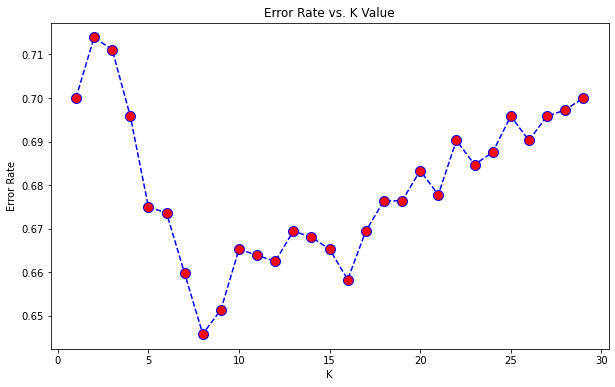

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [16]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


#Create a svm Classifier
model4 = neighbors.KNeighborsClassifier(n_neighbors = 8)

#Train the model using the training sets
model4.fit(x_train,y_train)

#Predict the response for test dataset
pred=model4.predict(x_test) 
#Results
print("KNN Results")
print("KNN: Accuracy: ",accuracy_score(y_test, pred)*100,"%")

KNN Results
KNN: Accuracy:  35.41666666666667 %
